# Import CSV

In [1]:
import pandas as pd
df = pd.read_csv('DSC 288 Processed Reddit Dataset.csv')
print(df)

                                                  Title  \
0     Your anger may be caused by a magnesium defici...   
1     Do you ever get so angry that you wish to kill...   
2     Does anyone else just avoid people because you...   
3     Was anyone else “not allowed” to get upset gro...   
4     I wish people understood that outbursts don't ...   
...                                                 ...   
9073  Fastest way I’ve found to get a panic attack u...   
9074                                 Looking for advice   
9075                        New panic attack experience   
9076  I’m having pretty bad suicidal thoughts, think...   
9077      Anxiety symptoms replicating low blood sugar?   

                                                   Text  Score  Topic  \
0     I tried absolutely everything to fix my chroni...    743  anger   
1     I don't know if it's my anger issues talking o...    692  anger   
2     Lately I’ve been noticing that I take the extr...    489  anger   

# Exploratory Data Analysis

In [2]:
# Word Count
df['Title_words'] = df['Title_pro'].apply(lambda x: len(x.split()))
df['Text_words'] = df['Text_pro'].apply(lambda x: len(x.split()))

# Character Count
df['Title_char'] = df['Title_pro'].apply(len)
df['Text_char'] = df['Text_pro'].apply(len)

# Average Word Length
df['Title_avg'] = df['Title_pro'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))
df['Text_avg'] = df['Text_pro'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))

print(df[['Title_words', 'Title_char', 'Title_avg']].describe())
print(df[['Text_words', 'Text_char', 'Text_avg']].describe())

       Title_words   Title_char    Title_avg
count  9078.000000  9078.000000  9078.000000
mean      5.878167    37.805684     5.675995
std       3.862876    25.517379     1.412500
min       1.000000     2.000000     1.000000
25%       3.000000    20.000000     4.875000
50%       5.000000    32.000000     5.500000
75%       7.000000    49.000000     6.333333
max      34.000000   228.000000    43.000000
        Text_words     Text_char     Text_avg
count  9078.000000   9078.000000  9078.000000
mean     85.525006    560.980392     5.547913
std     116.163931    790.886560     2.218972
min       1.000000      2.000000     1.000000
25%      29.000000    183.000000     5.150000
50%      57.000000    368.000000     5.444444
75%     102.000000    664.000000     5.750000
max    2721.000000  19078.000000   136.000000


In [3]:
df['T_T_words'] = df['T_T_pro'].apply(lambda x: len(x.split()))
df['T_T_char'] = df['T_T_pro'].apply(len)
df['T_T_avg'] = df['T_T_pro'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))
print(df[['T_T_words', 'T_T_char', 'T_T_avg']].describe())

         T_T_words      T_T_char      T_T_avg
count  9078.000000   9078.000000  9078.000000
mean     91.403173    599.786076     5.523591
std     116.172977    791.381370     1.038669
min       2.000000     14.000000     3.000000
25%      34.000000    222.000000     5.186104
50%      63.000000    406.000000     5.464286
75%     108.000000    703.000000     5.758170
max    2725.000000  19107.000000    75.952381


In [4]:
#Top 20 Most Common Words
from collections import Counter

all_words = " ".join(df['T_T_pro']).split()
word_freq = Counter(all_words)
print(word_freq.most_common(20))

[('im', 14877), ('like', 10722), ('feel', 9224), ('dont', 7421), ('get', 7108), ('time', 6316), ('know', 6133), ('ive', 5383), ('people', 5277), ('panic', 5137), ('day', 5061), ('want', 4881), ('thing', 4672), ('even', 4550), ('one', 4482), ('year', 4387), ('attack', 4376), ('life', 4375), ('really', 4200), ('go', 3743)]


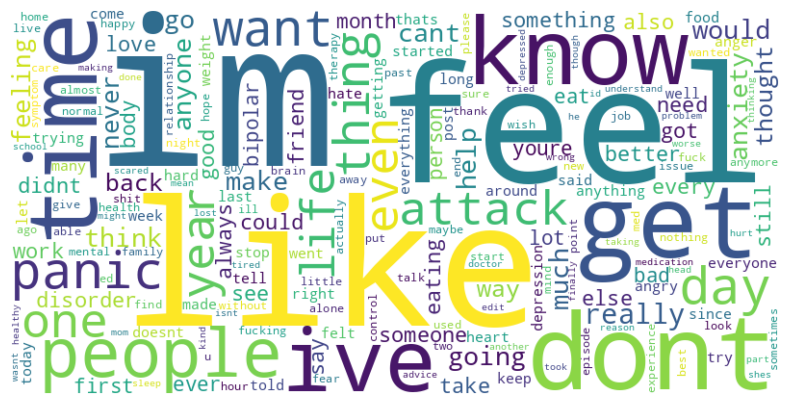

In [5]:
#Word Cloud Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
unique_values = df['Topic'].unique()

print(unique_values)

['anger' 'anxiety' 'bipolar' 'depression' 'eating disorder' 'panic']


In [7]:
for x in unique_values:
    df_filtered = df.loc[df['Topic'] == x]
    all_words = " ".join(df_filtered['T_T_pro']).split()
    word_freq = Counter(all_words)
    print(x," ",word_freq.most_common(20))

anger   [('im', 1848), ('anger', 1457), ('like', 1377), ('get', 1202), ('feel', 1100), ('angry', 1097), ('dont', 1017), ('people', 905), ('thing', 810), ('know', 768), ('time', 755), ('want', 732), ('ive', 652), ('even', 574), ('really', 515), ('one', 503), ('make', 488), ('cant', 480), ('would', 480), ('something', 477)]
anxiety   [('anxiety', 981), ('im', 911), ('like', 711), ('feel', 667), ('get', 570), ('time', 497), ('dont', 471), ('people', 469), ('day', 441), ('know', 399), ('anyone', 387), ('thing', 360), ('even', 341), ('else', 327), ('really', 320), ('one', 291), ('ive', 289), ('much', 283), ('anxious', 281), ('go', 281)]
bipolar   [('im', 3209), ('like', 2157), ('bipolar', 1844), ('feel', 1723), ('time', 1613), ('dont', 1518), ('get', 1508), ('know', 1486), ('thing', 1300), ('people', 1272), ('year', 1226), ('one', 1196), ('life', 1185), ('day', 1161), ('want', 1100), ('even', 1015), ('love', 991), ('ive', 982), ('would', 948), ('make', 881)]
depression   [('im', 2988), ('li